**Mushroom Classification**

Dataset e detalhes: https://www.kaggle.com/datasets/uciml/mushroom-classification

**Aluno:** Thiago César Silva Barbieri.
**RA:** 779807.
**Curso:** Engenharia da Computação.

Primeiramente, é importada a biblioteca pandas e usada a função **read_csv()** para ler um arquivo *.csv* chamado **"mushrooms.csv"** e criar um *DataFrame* com seus dados. O parâmetro **header=0** indica que a primeira linha do arquivo contém os nomes das colunas. O método **head()** é usado para imprimir as primeiras linhas do *DataFrame*.

In [1]:
import pandas as pd

df = pd.read_csv("mushrooms.csv", header=0)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


São criadas então duas variáveis: **X_nom** e **y_nom**. A variável **X_nom** recebe o *DataFrame* **df**, que contém os dados lidos a partir do arquivo *.csv*. A variável **y_nom** recebe a coluna *'class'* do DataFrame **X_nom**, que representa a classe dos dados (e.g., se o cogumelo é comestível ou venenoso). A função **pop()** remove a coluna *'class'* do *DataFrame* **X_nom** e retorna essa coluna como a variável **y_nom**. Dessa forma, a variável **X_nom** contém apenas os atributos dos dados, enquanto **y_nom** contém a classe-alvo. Os valores ainda são nominais (i.e., não numéricos).

In [2]:
X_nom = df
y_nom = X_nom.pop('class')

Os valores nominais dos dados são transformados em binários para que possam ser utilizados em um modelo de aprendizado de máquina. A função **get_dummies()** é usada para transformar as colunas de atributos do *DataFrame* **X_nom** em colunas binárias (dummy variables). A variável **y_nom** é transformada em valores binários (0 ou 1) utilizando o método **replace()**, que substitui os valores 'e' por 0 e 'p' por 1. O resultado final é que a variável **X** contém os atributos dos dados transformados em colunas binárias e a variável **y** contém as classes dos dados transformados em valores binários.

In [3]:
X = pd.get_dummies(X_nom)
y = y_nom.replace({'p': 1, 'e': 0})

Os dados são divididos em um conjunto de treinamento e um conjunto de teste para avaliar o desempenho de um modelo de aprendizado de máquina. A função **train_test_split()** é usada para fazer a divisão dos dados. A variável **X** contém os atributos dos dados, e **y** contém as classes dos dados. O parâmetro **test_size=0.3** indica que **30%** dos dados serão usados para **teste** e **70%** para **treinamento**. O parâmetro **random_state=1** é usado para garantir que a divisão dos dados seja feita da mesma forma em diferentes execuções do código, o que é útil para garantir a reprodutibilidade dos resultados. O resultado final é que as variáveis **X_train, X_test, y_train e y_test** contêm os dados divididos para treinamento e teste.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

É aplicado o algoritmo de indução da árvore de decisão aos dados de treinamento. A biblioteca **scikit-learn** é utilizada para implementar a árvore de decisão. A classe **DecisionTreeClassifier** é usada para criar um objeto **clf**, que representa o modelo de árvore de decisão. O parâmetro **criterion='entropy'\*** indica que a entropia será usada como medida de qualidade das divisões da árvore. O método **fit()** é usado para treinar o modelo com os dados de treinamento **X_train** e **y_train**. O resultado final é que o modelo de árvore de decisão é ajustado aos dados de treinamento e está pronto para ser avaliado com os dados de teste.

\**Quanto maior for a variação de entropia de um sistema.*

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf.fit(X_train,y_train)

É gerada uma visualização gráfica da árvore de decisão que foi criada a partir dos dados de treinamento. A biblioteca **matplotlib** é utilizada para plotar a árvore. A função **figure()** é usada para definir as dimensões da figura. A função **plot_tree()** é usada para plotar a árvore de decisão treinada pelo modelo **clf**. Os parâmetros **filled=True** e **rounded=True** são usados para tornar a visualização mais clara e esteticamente agradável.

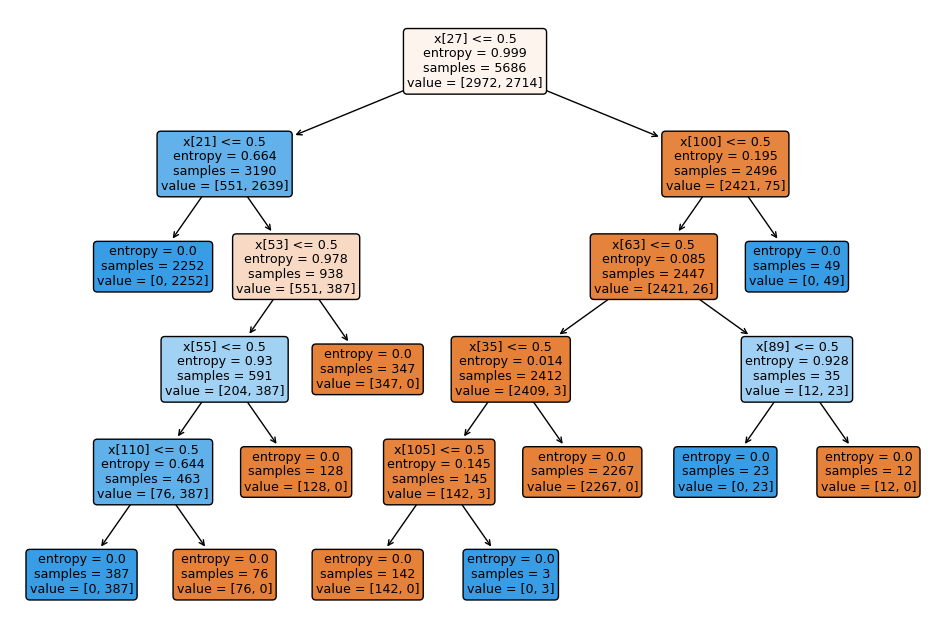

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, rounded=True)
plt.show()

É feita a predição das classes dos dados de teste **X_test** usando o modelo de árvore de decisão **clf**. O método **predict()** é usado para fazer a predição dos valores de **y** correspondentes aos dados de **X_test**. O resultado final é que a variável **y_pred** contém as classes preditas para os dados de teste.

In [7]:
y_pred = clf.predict(X_test)

São calculadas então várias métricas para avaliar o desempenho do modelo de árvore de decisão treinado **clf** na tarefa de predição das classes dos dados de teste **X_test**. A biblioteca **scikit-learn** é usada para implementar as métricas. A função **confusion_matrix()** é usada para calcular a matriz de confusão, que contém informações sobre as classes preditas e reais dos dados de teste. A função **accuracy_score()** é usada para calcular a taxa de acerto do modelo. A função **precision_score()** é usada para calcular a precisão do modelo, que mede a proporção de exemplos positivos classificados corretamente. A função **recall_score()** é usada para calcular a sensibilidade do modelo, que mede a proporção de exemplos positivos corretamente identificados pelo modelo. A função **f1_score()** é usada para calcular a média harmônica entre precisão e sensibilidade. O resultado final indica o desempenho do modelo na tarefa de predição. No caso específico desse código, a taxa de acerto foi de **100%**, ou seja, o modelo classificou todos os dados de teste corretamente.

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("R-score:" , recall_score(y_test, y_pred))
print("F-score:", f1_score(y_test, y_pred))

Confusion matrix:
 [[1236    0]
 [   0 1202]]
Accuracy: 1.0
Precision: 1.0
R-score: 1.0
F-score: 1.0
